In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [3]:
# Cargar el dataset
df = pd.read_csv(r'C:\UNAD\Titanic-Dataset.csv')

In [7]:
# 1. Análisis exploratorio de los datos
# Mostrar estadísticas generales y valores nulos
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

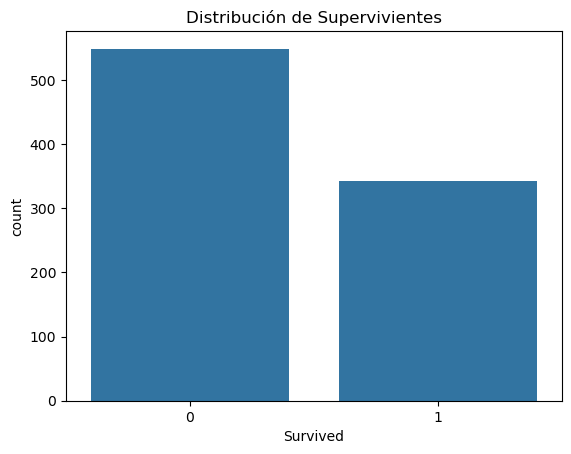

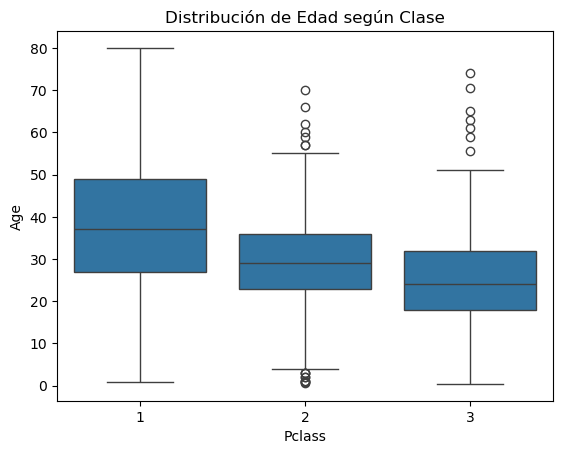

In [13]:
# Visualización de distribuciones
sns.countplot(x='Survived', data=df)
plt.title('Distribución de Supervivientes')
plt.show()

sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Distribución de Edad según Clase')
plt.show()

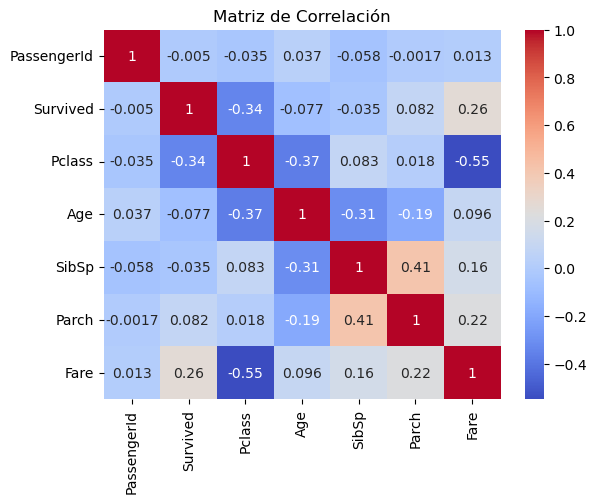

In [17]:
# Análisis de correlaciones
# Asegurarnos de eliminar columnas no numéricas antes del análisis de correlación
numeric_df = df.select_dtypes(include=[np.number])  # Selecciona solo columnas numéricas

# Calcular la matriz de correlación solo con las columnas numéricas
corr_matrix = numeric_df.corr()

# Visualizar la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [19]:
# 2. Preprocesamiento
# Eliminar columnas irrelevantes
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [21]:
# Imputar valores faltantes
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [23]:
# Codificar variables categóricas
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [25]:
# 3. Selección de características
# Mostrar correlación con la variable objetivo
print(df.corr()['Survived'].sort_values(ascending=False))

Survived      1.000000
Fare          0.257307
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.064910
Embarked_S   -0.149683
Pclass       -0.338481
Sex_male     -0.543351
Name: Survived, dtype: float64


In [27]:
# Seleccionar columnas relevantes manualmente
features = ['Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

In [29]:
# 4. División en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# 5. Entrenamiento del modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
# 6. Evaluación del modelo
# Predicciones
y_pred = model.predict(X_test)

In [35]:
# Métricas de evaluación
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

Matriz de Confusión:
 [[90 15]
 [19 55]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



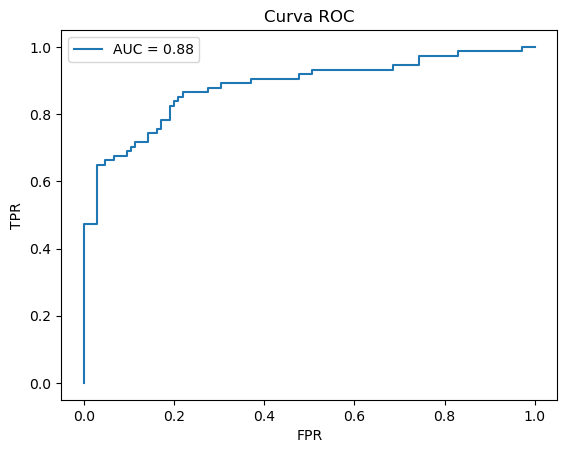

In [37]:
# Curva ROC
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_prob):.2f}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

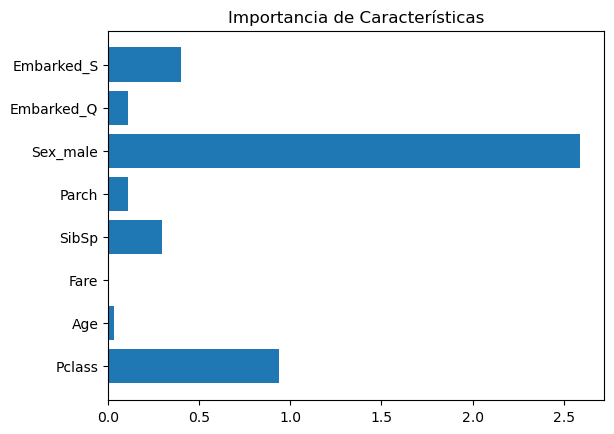

In [39]:
# 7. Gráficas de Resultados
# Gráfica de importancia de características
feature_importance = abs(model.coef_[0])
plt.barh(features, feature_importance)
plt.title('Importancia de Características')
plt.show()